In [1]:
from moonpies import moonpies as mm
from moonpies import default_config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cfg = default_config.Cfg()

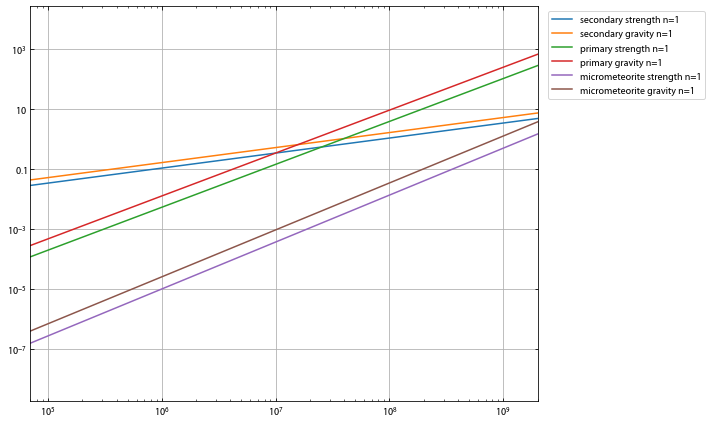

In [2]:
plt.figure(figsize=(10, 6))
t_elapsed = np.logspace(4, 10)
pop = 'primary'
regime = 'strength'
n_overturn = 1
for impactor in ['secondary', 'primary', 'micrometeorite']:
    # for n_overturn in (1, 10, 100):
    for regime in ('strength', 'gravity'):
        depth = np.zeros_like(t_elapsed)
        depth += mm.overturn_depth_costello(t_elapsed, impactor=impactor, regimes=[regime],
                                            n_overturn=n_overturn, prob=0.99, cfg=cfg)
        plt.loglog(t_elapsed, depth, label=f'{impactor} {regime} n={n_overturn}')
# plt.ylim(1e-3, 100)
plt.xlim(7e4, 2e9)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

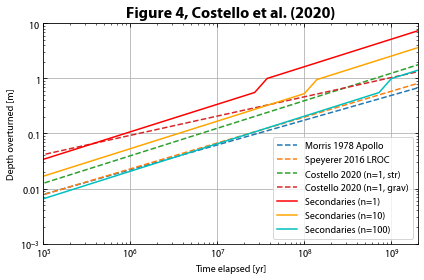

In [3]:
# See figure 4 Costello (2020)
plt.figure()
time_arr = np.logspace(3, 10)

# Apollo sample control group (plotted as line rather than points)
od_morris = mm.overturn_depth_morris(time_arr)
plt.loglog(time_arr, od_morris, '--', label='Morris 1978 Apollo')

# LRO observation control group (plotted as line rather than points)
od_speyerer = mm.overturn_depth_speyerer(time_arr)
plt.loglog(time_arr, od_speyerer, '--', label='Speyerer 2016 LROC')

# Costello reported strength regime equation
od_costello_str = mm.overturn_depth_costello_str(time_arr)
plt.loglog(time_arr, od_costello_str, '--', label='Costello 2020 (n=1, str)')

od_costello_grav = mm.overturn_depth_costello_grav(time_arr)
plt.loglog(time_arr, od_costello_grav, '--', label='Costello 2020 (n=1, grav)')


# Set up overturn for secondaries, 99% probability
prob = 0.99
impactor = 'secondary'

# Plot 1, 10, 100 overturns
for n_overturns, c in zip((1, 10, 100), ('r', 'orange', 'c')):
    depth = mm.overturn_depth_costello(time_arr, impactor=impactor, 
                                        n_overturn=n_overturns, prob=prob, cfg=cfg)
    plt.loglog(time_arr, depth, c=c, label=f'Secondaries (n={n_overturns})')

plt.ylim(1e-3, 10)
plt.xlim(1e5, 2e9)
plt.xlabel('Time elapsed [yr]')
plt.ylabel('Depth overturned [m]')
plt.legend()
plt.title('Figure 4, Costello et al. (2020)', fontweight='bold', fontsize=16)
# plt.savefig('/home/cjtu/projects/moonpies/figs/overturn_number_test.png', bbox_inches='tight', dpi=300)
plt.show()

## Plot total depth scaled by impact flux over time

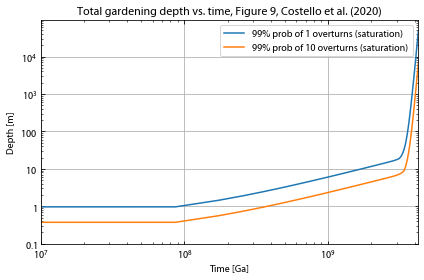

In [33]:
time_arr = np.linspace(cfg.timestart, 0)
new_cfg = default_config.Cfg()

new_cfg.overturn_prob = 0.99
for n in (1, 10):
    new_cfg.n_overturn = n
    od = mm.overturn_depth_costello_time(time_arr, new_cfg)

    # Accumulate gardening at each timestep
    od_cumu = np.cumsum(od[::-1])[::-1]
    satstr = 'equilibrium' if prob == 0.02 else 'saturation'
    label = f'{prob:.0%} prob of {n} overturns ({satstr})'
    plt.loglog(time_arr, od_cumu, label=label)
plt.title('Total gardening depth vs. time, Figure 9, Costello et al. (2020)')
# plt.ylim(1e-1, 1e4)
plt.xlim(1e7, 4.2e9)
plt.ylabel('Depth [m]')
plt.xlabel('Time [Ga]')
plt.legend()
# plt.savefig('/home/cjtu/projects/moonpies/figs/total_overturn_depth.png', bbox_inches='tight', dpi=300)
plt.show()

## Plot lambda probability table

0.01    0.010050
0.02    0.020203
0.05    0.051293
0.10    0.105361
0.20    0.223143
0.30    0.356675
0.40    0.510826
0.50    0.693147
0.60    0.916291
0.70    1.203973
0.80    1.609438
0.90    2.302585
0.95    2.995731
0.97    3.506556
0.99    4.605165
Name: 1.0, dtype: float64


,0.10,0.50,0.99
n,,,
1.0,0.105361,0.693147,4.605165
2.0,0.530000,1.678000,6.638000
3.0,1.102000,2.674000,8.406000
4.0,1.742000,3.672000,10.050000
6.0,3.150000,5.670000,13.110000


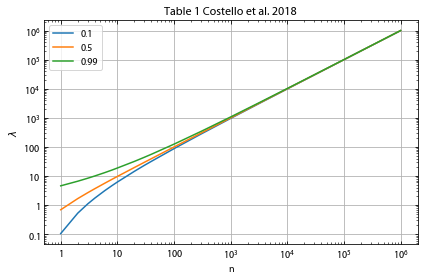

In [26]:
# Table 1 from Costello et al. (2018)
df = mm.read_lambda_table(cfg.costello_csv_in)
sdf = df.loc[:, [0.1, 0.5, 0.99]]
sdf.plot(logx=True, logy=True)
plt.ylabel('$\lambda$')
plt.title('Table 1 Costello et al. 2018')
print(df.iloc[0])  # n=1 is filled
sdf.head()  # otherwise only 0.1, 0.5, 0.99